## Question 1
- Using gutenberg files to do the analysis.
- Using glob to open files instead of nltk build in functions.
- Generate loglog plot by using matplotlib.

In [1]:
from nltk.corpus import gutenberg
from nltk import FreqDist
from glob import glob
from string import punctuation

In [39]:
def read_files(file_name):      # Create a function to read files. 
    with open (file_name, encoding='utf-8', errors="ignore") as file_content:   # Need to deal with unicode problem.
        lines = file_content.read()
         # Remove punctuations and numbers and save as lowercase
        pure_file = ''.join(ch.lower() for ch in lines if ch not in punctuation and ch.isdigit()==False)
        words_list = pure_file.split()
        return words_list

In [40]:
words_list = []
path = glob('/Users/Nick/nltk_data/corpora/gutenberg/*.txt')    # Use glob to find the path. 
for file in path:
    words_list.extend(read_files(file))

In [41]:
print(words_list[:50])

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twentyone', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'she', 'was']


In [42]:
fd = FreqDist(words_list)    # Get words frequency.

In [43]:
print(fd.N())

2102546


In [44]:
print(fd.B())

53341


In [45]:
fd.most_common(10)

[('the', 133211),
 ('and', 94787),
 ('of', 71173),
 ('to', 47591),
 ('a', 33573),
 ('in', 33391),
 ('i', 28593),
 ('that', 28241),
 ('he', 25409),
 ('it', 21537)]

In [46]:
freq_list = []

In [47]:
for word in fd.keys():
    freq_list.append([word, fd[word]])  

In [48]:
sorted_freq_list = sorted(freq_list, key=lambda t:t[1], reverse=True)  

In [49]:
rank = 1           # Create a Words Rank Frequency list save each elements as a sublist.
freq_rank_list = []
for word in sorted_freq_list:
    word.insert(1,rank)      # Insert rank in the second position.
    rank += 1
    freq_rank_list.append(word)

In [50]:
print(freq_rank_list[:50]) 

[['the', 1, 133211], ['and', 2, 94787], ['of', 3, 71173], ['to', 4, 47591], ['a', 5, 33573], ['in', 6, 33391], ['i', 7, 28593], ['that', 8, 28241], ['he', 9, 25409], ['it', 10, 21537], ['his', 11, 21375], ['for', 12, 19396], ['was', 13, 18647], ['with', 14, 17560], ['not', 15, 17281], ['is', 16, 16343], ['be', 17, 16056], ['you', 18, 15878], ['as', 19, 14464], ['but', 20, 13558], ['all', 21, 13557], ['they', 22, 12983], ['him', 23, 12928], ['shall', 24, 11676], ['her', 25, 11446], ['my', 26, 10462], ['had', 27, 10305], ['them', 28, 10199], ['have', 29, 10100], ['said', 30, 9396], ['me', 31, 9360], ['at', 32, 9134], ['from', 33, 9062], ['unto', 34, 9010], ['she', 35, 8897], ['this', 36, 8848], ['which', 37, 8742], ['on', 38, 8536], ['by', 39, 8457], ['lord', 40, 8441], ['their', 41, 7790], ['so', 42, 7704], ['will', 43, 7311], ['were', 44, 6872], ['are', 45, 6838], ['thou', 46, 6740], ['when', 47, 6296], ['or', 48, 6272], ['one', 49, 6066], ['there', 50, 6032]]


In [51]:
import csv

In [52]:
def create_csv(list,file_name):
    with open(file_name,'w') as f:
        w = csv.writer(f)
        w.writerow(["Words","Rank","Frequency"]) # This is a recommanded way. Do not add title in front of your list.
        for cell in list:                        # Otherwise your list will not be reuse later. 
            w.writerow(cell[:])

In [53]:
create_csv(freq_rank_list, 'Zipfs_law_list.csv')     # Must contains '.csv'

In [54]:
import matplotlib.pyplot as plt      
%matplotlib inline

In [55]:
ranks = [r[1] for r in freq_rank_list]
freqs = [f[2] for f in freq_rank_list]

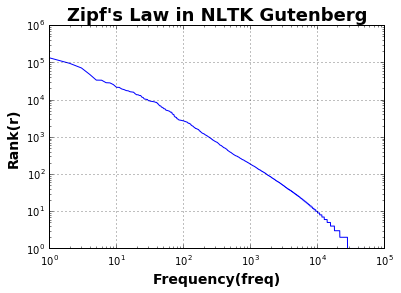

In [56]:
# Show word's rank and frequency relationship in log-log plot using matplotlib 
plt.loglog(ranks, freqs)
plt.title('Zipf\'s Law in NLTK Gutenberg', fontsize=18, fontweight='bold')
plt.xlabel('Frequency(freq)', fontsize=14, fontweight='bold')
plt.ylabel('Rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

## Conclusion
- According to the figure we generated from gutenberg files' words frequency-rank collection. We could easily see that Zipf's Law works in natural language as well. 